In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(100)
LEVEL = 'level_1'


In [2]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    best_w = 0
    best_b = 0
    best_acc =0
    # initialise w, b
    if initialise:
      self.w = np.zeros((1, X.shape[1]))
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
         
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
      #print("dw",dw)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        #print(Y_pred)
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
      Y_pred =(Y_pred>= 0.5).astype(int)
      accuracy = accuracy_score(Y_pred,Y.reshape(-1,1))
      if(accuracy>=best_acc):
                    best_acc = accuracy
                    best_w   = self.w
                    best_b   = self.b
    self.w   = best_w
    self.b   = best_b
    if display_loss:
      print(loss.values())
      print("w,b",self.w,self.b)
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [3]:
class SigmoidNeuron1:
    def __init__(self):
        self.w = None
        self.b = None  
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    def forward_prop(self,X):
        #print("forwar_prop",X.shape,self.w.shape,self.b,self.sigmoid(np.dot (X,self.w) + self.b).shape)
        return self.sigmoid(np.dot (X,self.w) + self.b)
    def backward_prop(self,X,Y):
        m = X.shape[0]
        #print(self.forward_prop(X).shape,Y.reshape(-1,1).shape)
        dz = self.forward_prop(X) -Y.reshape(-1,1) 
        #print("dz X",dz.shape,X.shape,type(dz))
        db = np.sum(dz)
        dw = np.dot(X.T,dz)
        #print("dw db",dw.shape,db)
        return dw,db
    def loss(self,y,y_predict):
        m=y.shape[0]
        y=y.reshape(-1,1)
        print(y.shape)
        #print(y_predict)
        for i,j,k in zip(y,y_predict,(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))):
            print(i,j,k)
            print(i*np.log(j))
            print(1-i,np.log(1-j),(1-i)*np.log(1-j))
        print((y*np.log(y_predict)+(1-y)*np.log(1-y_predict)))
        return -1/m*np.sum(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))
    def update(self,dw,db,learning_rate):
        self.w  = self.w -learning_rate* dw
        self.b  = self.b -learning_rate* db 
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse",display_loss=False):
        loss_list =[]
        if(initialise):
            self.w = np.zeros((X.shape[1],1))
            self.b = 0
            dw     = 0
            db     = 0
            best_w = 0
            best_b = 0
            best_acc =0
        for iter1 in range(epochs):
                y_predict = self.forward_prop(X)
                #print(y_predict)
                
                dw,db = self.backward_prop(X,Y)
                self.update(dw,db,learning_rate)
                y_predict = self.forward_prop(X)
                loss_list.append(log_loss(Y,y_predict))
                y_predict =(y_predict>= 0.5).astype(int)
                accuracy = accuracy_score(y_predict,Y.reshape(-1,1))
                if(accuracy>=best_acc):
                    best_acc = accuracy
                    best_w   = self.w
                    best_b   = self.b
        self.w   = best_w
        self.b   = best_b
                #print(y_predict)
        if display_loss:
            print(loss_list)
            print("w,b",self.w,self.b)
            plt.plot(loss_list)
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
    def predict(self,X):
        return self.forward_prop(X)         

In [4]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    print (files)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("L")
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images

In [5]:
LEVEL = 'level_1'
languages = ['ta', 'hi', 'en']

images_train = read_all("../input/"+ LEVEL+ "_train/" +LEVEL+"/"+"background", key_prefix='bgr_') # change the path
for language in languages:
   images_train.update(read_all("../input/"+ LEVEL+ "_train/" +LEVEL+"/"+language, key_prefix=language+"_" ))
print(len(images_train))

images_test = read_all("../input/"+ LEVEL+ "_test/" +"kaggle_"+LEVEL, key_prefix='')

Reading:
['145.jpg', '19_d2.jpg', '44_d3.jpg', '15_d2.jpg', '46_d2.jpg', '34.jpg', '51_d2.jpg', '90.jpg', '100_d3.jpg', '106_d2.jpg', '97_d2.jpg', '58_d2.jpg', '48.jpg', '62_d3.jpg', '123.jpg', '106.jpg', '21_d2.jpg', '48_d3.jpg', '138.jpg', '78_d3.jpg', '91_d3.jpg', '98_d2.jpg', '141.jpg', '69.jpg', '109_d2.jpg', '60_d2.jpg', '113_d2.jpg', '86_d2.jpg', '122.jpg', '16_d2.jpg', '140.jpg', '115_d2.jpg', '100_d2.jpg', '117.jpg', '49_d3.jpg', '17.jpg', '96_d3.jpg', '90_d2.jpg', '25_d3.jpg', '135_d3.jpg', '72.jpg', '142_d3.jpg', '119.jpg', '7_d3.jpg', '131_d3.jpg', '12_d2.jpg', '101_d3.jpg', '143.jpg', '93_d3.jpg', '116_d2.jpg', '10.jpg', '44_d2.jpg', '137_d3.jpg', '83_d2.jpg', '111_d3.jpg', '74.jpg', '21.jpg', '134.jpg', '112.jpg', '4.jpg', '84_d3.jpg', '146_d2.jpg', '88_d2.jpg', '36_d3.jpg', '44.jpg', '26_d2.jpg', '45_d2.jpg', '146_d3.jpg', '97.jpg', '136.jpg', '149.jpg', '54_d3.jpg', '56_d3.jpg', '116.jpg', '58.jpg', '2_d3.jpg', '67.jpg', '69_d2.jpg', '147.jpg', '110_d2.jpg', '84.jpg', '


Reading:
['c70_127.jpg', 'c11_29.jpg', 'c64_87.jpg', 'c55_81.jpg', 'c10_6.jpg', 'c18_12.jpg', 'c2_147.jpg', 'c63_16.jpg', 'c69_3.jpg', 'c74_106.jpg', 'c32_4.jpg', 'c39_92.jpg', 'c22_62.jpg', 'c48_124.jpg', 'c60_95.jpg', 'c26_7.jpg', 'c57_76.jpg', 'c15_120.jpg', 'c53_141.jpg', 'c62_116.jpg', 'c3_73.jpg', 'c22_13.jpg', 'c34_68.jpg', 'c4_113.jpg', 'c21_5.jpg', 'c25_69.jpg', 'c0_33.jpg', 'c85_123.jpg', 'c49_145.jpg', 'c33_82.jpg', 'c8_9.jpg', 'c92_110.jpg', 'c83_37.jpg', 'c65_61.jpg', 'c62_63.jpg', 'c77_24.jpg', 'c61_138.jpg', 'c2_142.jpg', 'c36_133.jpg', 'c71_31.jpg', 'c17_149.jpg', 'c70_45.jpg', 'c79_46.jpg', 'c76_70.jpg', 'c25_85.jpg', 'c38_101.jpg', 'c52_51.jpg', 'c0_89.jpg', 'c34_8.jpg', 'c71_28.jpg', 'c10_102.jpg', 'c45_131.jpg', 'c8_80.jpg', 'c69_22.jpg', 'c54_49.jpg', 'c81_86.jpg', 'c92_119.jpg', 'c27_10.jpg', 'c12_108.jpg', 'c59_34.jpg', 'c55_114.jpg', 'c90_125.jpg', 'c90_137.jpg', 'c30_139.jpg', 'c31_98.jpg', 'c64_57.jpg', 'c42_93.jpg', 'c40_109.jpg', 'c56_136.jpg', 'c8_121.jpg'


Reading:
['c4_82.jpg', 'c1_43.jpg', 'c1_104.jpg', 'c10_128.jpg', 'c8_106.jpg', 'c7_56.jpg', 'c5_125.jpg', 'c9_89.jpg', 'c0_9.jpg', 'c6_133.jpg', 'c11_91.jpg', 'c7_24.jpg', 'c4_70.jpg', 'c3_6.jpg', 'c11_41.jpg', 'c11_42.jpg', 'c10_101.jpg', 'c11_80.jpg', 'c6_93.jpg', 'c10_54.jpg', 'c11_15.jpg', 'c4_109.jpg', 'c7_4.jpg', 'c9_30.jpg', 'c7_1.jpg', 'c4_17.jpg', 'c2_138.jpg', 'c7_141.jpg', 'c4_135.jpg', 'c10_140.jpg', 'c1_144.jpg', 'c9_113.jpg', 'c2_8.jpg', 'c1_51.jpg', 'c1_102.jpg', 'c11_84.jpg', 'c1_94.jpg', 'c9_108.jpg', 'c11_12.jpg', 'c8_129.jpg', 'c6_37.jpg', 'c7_22.jpg', 'c0_23.jpg', 'c8_46.jpg', 'c10_64.jpg', 'c1_7.jpg', 'c6_100.jpg', 'c6_81.jpg', 'c6_126.jpg', 'c8_146.jpg', 'c10_63.jpg', 'c6_36.jpg', 'c0_16.jpg', 'c0_78.jpg', 'c11_118.jpg', 'c10_137.jpg', 'c9_32.jpg', 'c7_112.jpg', 'c6_31.jpg', 'c2_149.jpg', 'c3_14.jpg', 'c10_72.jpg', 'c4_2.jpg', 'c0_99.jpg', 'c2_98.jpg', 'c7_34.jpg', 'c7_96.jpg', 'c2_10.jpg', 'c6_45.jpg', 'c10_62.jpg', 'c0_119.jpg', 'c1_18.jpg', 'c2_52.jpg', 'c5_67


Reading:
['c33_142.jpg', 'c17_71.jpg', 'c47_144.jpg', 'c37_43.jpg', 'c6_108.jpg', 'c10_34.jpg', 'c16_10.jpg', 'c23_77.jpg', 'c23_140.jpg', 'c13_97.jpg', 'c32_85.jpg', 'c18_37.jpg', 'c18_90.jpg', 'c2_107.jpg', 'c36_46.jpg', 'c34_146.jpg', 'c43_129.jpg', 'c21_45.jpg', 'c36_79.jpg', 'c34_86.jpg', 'c7_132.jpg', 'c14_61.jpg', 'c33_84.jpg', 'c38_38.jpg', 'c50_87.jpg', 'c4_106.jpg', 'c10_130.jpg', 'c42_56.jpg', 'c16_40.jpg', 'c38_27.jpg', 'c51_64.jpg', 'c44_68.jpg', 'c14_50.jpg', 'c21_109.jpg', 'c7_4.jpg', 'c26_30.jpg', 'c21_133.jpg', 'c25_145.jpg', 'c51_35.jpg', 'c9_123.jpg', 'c51_81.jpg', 'c28_15.jpg', 'c31_75.jpg', 'c44_32.jpg', 'c12_128.jpg', 'c27_135.jpg', 'c8_14.jpg', 'c2_59.jpg', 'c12_118.jpg', 'c16_96.jpg', 'c36_25.jpg', 'c27_139.jpg', 'c38_92.jpg', 'c18_110.jpg', 'c20_101.jpg', 'c32_62.jpg', 'c45_137.jpg', 'c18_115.jpg', 'c25_65.jpg', 'c45_131.jpg', 'c4_26.jpg', 'c30_98.jpg', 'c46_31.jpg', 'c7_74.jpg', 'c19_105.jpg', 'c44_6.jpg', 'c0_73.jpg', 'c7_69.jpg', 'c1_125.jpg', 'c32_11.jpg',


900
Reading:
['145.jpg', '34.jpg', '90.jpg', '261.jpg', '48.jpg', '289.jpg', '155.jpg', '123.jpg', '106.jpg', '158.jpg', '195.jpg', '274.jpg', '138.jpg', '162.jpg', '281.jpg', '141.jpg', '69.jpg', '273.jpg', '122.jpg', '140.jpg', '268.jpg', '117.jpg', '17.jpg', '256.jpg', '231.jpg', '251.jpg', '72.jpg', '119.jpg', '152.jpg', '287.jpg', '269.jpg', '143.jpg', '296.jpg', '248.jpg', '277.jpg', '176.jpg', '10.jpg', '161.jpg', '201.jpg', '74.jpg', '21.jpg', '134.jpg', '112.jpg', '4.jpg', '272.jpg', '44.jpg', '97.jpg', '136.jpg', '149.jpg', '181.jpg', '295.jpg', '116.jpg', '279.jpg', '194.jpg', '58.jpg', '67.jpg', '174.jpg', '147.jpg', '84.jpg', '198.jpg', '270.jpg', '114.jpg', '85.jpg', '92.jpg', '220.jpg', '47.jpg', '219.jpg', '207.jpg', '64.jpg', '159.jpg', '129.jpg', '9.jpg', '61.jpg', '51.jpg', '73.jpg', '260.jpg', '28.jpg', '11.jpg', '288.jpg', '36.jpg', '111.jpg', '218.jpg', '212.jpg', '118.jpg', '240.jpg', '224.jpg', '53.jpg', '236.jpg', '13.jpg', '46.jpg', '7.jpg', '227.jpg', '93.jp

In [6]:
list(images_test.keys())[:5]

['145', '34', '90', '261', '48']

In [7]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
  ID_test.append(int(key))
  X_test.append(value)
  
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(900, 256) (900,)
(300, 256)


In [8]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[1.4928474857926401, 1.2584292945385653, 1.0724475870044392, 0.9671830992517415, 0.9031737540852991, 0.8149296225064889, 0.7336450256932815, 0.6679446195200275, 0.6253333459864884, 0.5882445016983436, 0.5506474300212255, 0.5128324622962959, 0.4696533245113488, 0.44412511660282405, 0.4159206887455703, 0.3794868071785328, 0.345164278179632, 0.3162168966608119, 0.2872910889510469, 0.2607482907041605, 0.23178763552311255, 0.20358758710266558, 0.18363247402590685, 0.16558944312750645, 0.1477525452633151, 0.12997542255275046, 0.11270364704183737, 0.09911370769054813, 0.08943304528204776, 0.08270036473273049, 0.079597382481661, 0.07836408847006134, 0.0764161057991719, 0.07472664972362612, 0.0731405481352398, 0.07160261083767976, 0.07009098483372271, 0.06846220242022158, 0.06553705240713627, 0.06262242534840312, 0.05971752921432369, 0.0568235677286225, 0.05394378459647593, 0.05108302404635605, 0.048245777982400706, 0.04543278308803431, 0.04263930426370752, 0.03985799010195648, 0.03708302390534

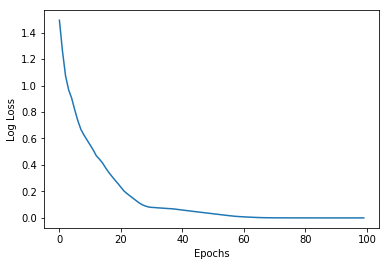

In [9]:
sn_mse = SigmoidNeuron1()
sn_mse.fit(X_scaled_train, Y_train, epochs=100, learning_rate=0.015, loss_fn="mse", display_loss=True)


dict_values([1.4928474857926406, 1.2584292945385656, 1.072447587004439, 0.9671830992517415, 0.903173754085298, 0.8149296225064881, 0.7336450256932812, 0.667944619520027, 0.6253333459864876, 0.5882445016983427, 0.5506474300212247, 0.5128324622962953, 0.4696533245113485, 0.4441251166028237, 0.4159206887455703, 0.3794868071785329, 0.3451642781796321, 0.3162168966608119, 0.287291088951047, 0.26074829070416045, 0.23178763552311263, 0.20358758710266575, 0.18363247402590696, 0.16558944312750662, 0.1477525452633153, 0.12997542255275069, 0.1127036470418375, 0.0991137076905484, 0.08943304528204805, 0.08270036473273067, 0.07959738248166108, 0.07836408847006127, 0.07641610579917182, 0.07472664972362607, 0.07314054813523975, 0.07160261083767967, 0.07009098483372266, 0.06846220242022168, 0.06553705240713635, 0.06262242534840318, 0.0597175292143238, 0.05682356772862257, 0.05394378459647598, 0.05108302404635615, 0.048245777982400755, 0.04543278308803442, 0.042639304263707614, 0.039857990101956606, 0.

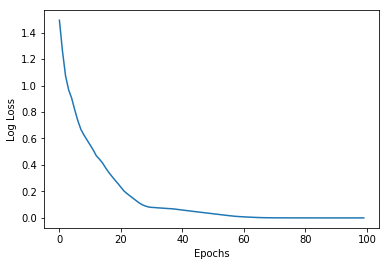

In [10]:
sn_mse = SigmoidNeuron()
sn_mse.fit(X_scaled_train, Y_train, epochs=100, learning_rate=0.015, loss_fn="ce", display_loss=True)

In [11]:

#sn_ce.fit(X_scaled_train, Y_train, epochs=100, learning_rate=0.015, loss_fn="ce", display_loss=True)

from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=8,shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(X_scaled_train) # returns the number of splitting iterations in the cross-validator
#print(kf) 


def cross_validation(learning_rate,epochs):
    acc =[]
    for train_index, test_index in kf.split(X_scaled_train):
        #print(train_index,test_index)
        sn_ce = SigmoidNeuron1()
        sn_ce.fit(X_scaled_train[train_index], Y_train[train_index], epochs=epochs, learning_rate=learning_rate, loss_fn="ce", display_loss=False)
        Y_pred_binarised_train = (sn_ce.predict(X_scaled_train[test_index])>= 0.5).astype("int").ravel()
        accuracy_test = accuracy_score(Y_pred_binarised_train, Y_train[test_index])
        acc.append(accuracy_test)
    #print(acc)
    accuracy =sum(acc)/len(acc)
    return accuracy



In [12]:
#epochs_list =[4000,6000,7000]
#lr_rate_list =[0.0003,0.0008,0.0005]
#acc_dic ={}
#for epoch in epochs_list:
#    for lr_rate in lr_rate_list:
#        acc_dic[(epoch,lr_rate)] = cross_validation(lr_rate,epoch)

#print(acc_dic)

In [13]:
#Grid Search
epochs_list =[40,100,1000,2000]
lr_rate_list =[0.006,0.020,0.015,0.010,0.008]
acc_dic ={}
for epoch in epochs_list:
    for lr_rate in lr_rate_list:
        acc_dic[(epoch,lr_rate)] = cross_validation(lr_rate,epoch)

print(acc_dic)

{(40, 0.006): 0.9755550726927938, (40, 0.02): 0.9766810208596713, (40, 0.015): 0.9744488780025284, (40, 0.01): 0.9744291245259166, (40, 0.008): 0.9722463653603034, (100, 0.006): 0.9755945796460178, (100, 0.02): 0.9755748261694057, (100, 0.015): 0.9755155657395702, (100, 0.01): 0.973322929835651, (100, 0.008): 0.9767106510745891, (1000, 0.006): 0.9788835335018964, (1000, 0.02): 0.9777674620733249, (1000, 0.015): 0.9766316371681415, (1000, 0.01): 0.981125553097345, (1000, 0.008): 0.9788736567635904, (2000, 0.006): 0.9822021175726929, (2000, 0.02): 0.9777773388116309, (2000, 0.015): 0.9789032869785083, (2000, 0.01): 0.9811156763590391, (2000, 0.008): 0.9788934102402023}


[0.24141022771761433, 0.20608144382978502, 0.17802746487184043, 0.15577235535477868, 0.13758574747264185, 0.12235019845319749, 0.10944564355846778, 0.09846155748046585, 0.08904570417200895, 0.08088150126987238, 0.07371627581578824, 0.0673713168490234, 0.06172726317735438, 0.056703201397155324, 0.05223942162646257, 0.048285598629691236, 0.04479402098139058, 0.04171702460565315, 0.03900718345844463, 0.036618647624356154, 0.034508532637406504, 0.03263790972322645, 0.030972328321874187, 0.02948193851432005, 0.028141311668703862, 0.026929059608614542, 0.025827344196645976, 0.024821352386293283, 0.02389878998098631, 0.023049425758972432, 0.02226470014718591, 0.021537400639051588, 0.020861399154900366, 0.020231443235066652, 0.01964299199602785, 0.019092088136532792, 0.018575258274537293, 0.018089435124343516, 0.017631896264066783, 0.01720021538046168, 0.016792222856797347, 0.016405973372056157, 0.016039718810986047, 0.015691885262695538, 0.015361053235539051, 0.015045940464696986, 0.014745386

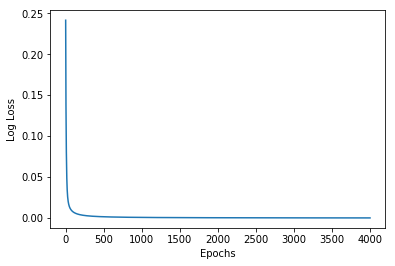

In [14]:
sn_ce = SigmoidNeuron1()
best_epoch   = 4000
best_lr_rate = 0.0008
sn_ce.fit(X_scaled_train, Y_train, epochs=best_epoch, learning_rate=best_lr_rate, loss_fn="ce", display_loss=True)
Y_pred_binarised_train = (sn_ce.predict(X_scaled_train)>= 0.5).astype("int").ravel()



dict_values([0.24141022771761414, 0.20608144382978494, 0.17802746487184032, 0.15577235535477857, 0.13758574747264177, 0.12235019845319745, 0.10944564355846773, 0.09846155748046583, 0.08904570417200895, 0.08088150126987236, 0.07371627581578823, 0.0673713168490234, 0.061727263177354406, 0.05670320139715533, 0.05223942162646259, 0.048285598629691236, 0.04479402098139059, 0.04171702460565318, 0.03900718345844466, 0.03661864762435618, 0.03450853263740653, 0.03263790972322648, 0.030972328321874208, 0.029481938514320075, 0.028141311668703883, 0.026929059608614567, 0.025827344196646007, 0.024821352386293315, 0.023898789980986327, 0.023049425758972463, 0.02226470014718593, 0.021537400639051612, 0.02086139915490038, 0.02023144323506668, 0.019642991996027866, 0.01909208813653281, 0.018575258274537317, 0.01808943512434353, 0.017631896264066794, 0.017200215380461743, 0.016792222856797358, 0.016405973372056175, 0.01603971881098606, 0.01569188526269555, 0.015361053235539063, 0.015045940464697, 0.014

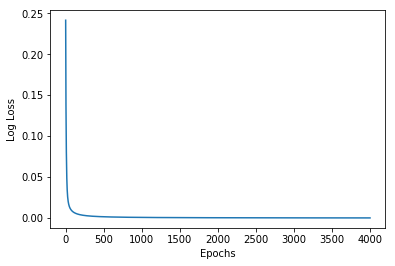

In [15]:

sn_ce = SigmoidNeuron()
best_epoch   = 4000
best_lr_rate = 0.0008
sn_ce.fit(X_scaled_train, Y_train, epochs=best_epoch, learning_rate=best_lr_rate, loss_fn="ce", display_loss=True)
Y_pred_binarised_train = (sn_ce.predict(X_scaled_train)>= 0.5).astype("int").ravel()

In [16]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_scaled_train)
  Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)

In [17]:
print_accuracy(sn_mse)
print_accuracy(sn_ce)

Train Accuracy :  1.0
--------------------------------------------------
Train Accuracy :  1.0
--------------------------------------------------


## Sample Submission

In [18]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_binarised_test

submission = pd.DataFrame(submission)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("submisision.csv", index=False)

In [19]:
!pwd


/kaggle/working
